<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/forwardNN_n4000_rawdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [116]:
# データの準備、読み込み


## データファイルのpath(位置データはrawの方)
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data_raw.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data_raw.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

In [117]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 4000                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 0                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)


### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [118]:
lst_x_fp_train.shape

(3200, 2)

In [119]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

# モデル定義とコンパイル
model_1 = Model(inputs=[x.input, y.input], outputs=z)
model_1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [120]:
x_fp_train_n

array([[0.69565217, 0.89130435],
       [0.13043478, 0.84782609],
       [0.95652174, 0.04347826],
       ...,
       [0.86956522, 0.73913043],
       [0.10869565, 0.80434783],
       [0.13043478, 0.        ]])

In [121]:
# 学習
epochs = 2000
batch_size = 64
history = model_1.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
50/50 [==============================] - 1s 10ms/step - loss: 0.4107 - mae: 0.2267 - val_loss: 0.3562 - val_mae: 0.1594
Epoch 2/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.2088 - mae: 0.1417 - val_loss: 0.2562 - val_mae: 0.1654
Epoch 3/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.1773 - mae: 0.1327 - val_loss: 0.1880 - val_mae: 0.1247
Epoch 4/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1850 - mae: 0.1137 - val_loss: 0.1381 - val_mae: 0.1041
Epoch 5/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.1561 - mae: 0.1111 - val_loss: 0.1158 - val_mae: 0.1030
Epoch 6/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.0933 - mae: 0.0974 - val_loss: 0.0892 - val_mae: 0.0916
Epoch 7/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.0994 - mae: 0.0944 - val_loss: 0.0778 - val_mae: 0.0853
Epoch 8/2000
50/50 [==============================] - 0s 7ms/step - loss: 0

In [122]:
# モデルの評価
score = model_1.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 2ms/step - loss: 0.0066 - mae: 0.0167
Test loss: 0.006592379882931709
Test mae: 0.016742689535021782


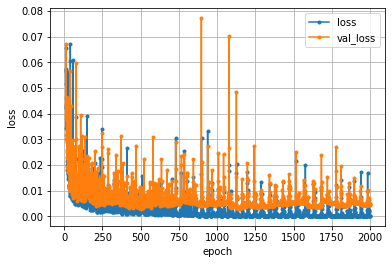

In [123]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>0.1: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

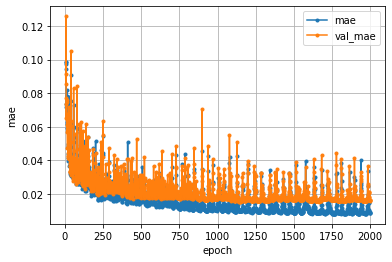

In [124]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>0.1: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [125]:
# 学習モデルの保存
model_1.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [126]:
# model_2

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合
seed = 0                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [127]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_2 = Model(inputs=[x.input, y.input], outputs=z)
model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [128]:
# 学習
epochs = 2000
batch_size = 64
history = model_2.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
32/32 [==============================] - 1s 14ms/step - loss: 0.3332 - mae: 0.2293 - val_loss: 0.2613 - val_mae: 0.1656
Epoch 2/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.5014 - mae: 0.1943 - val_loss: 0.2242 - val_mae: 0.1547
Epoch 3/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.3242 - mae: 0.1694 - val_loss: 0.1943 - val_mae: 0.1381
Epoch 4/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.1413 - mae: 0.1208 - val_loss: 0.2221 - val_mae: 0.1745
Epoch 5/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.3641 - mae: 0.1849 - val_loss: 0.1631 - val_mae: 0.1325
Epoch 6/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.2667 - mae: 0.1425 - val_loss: 0.1409 - val_mae: 0.1179
Epoch 7/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.2370 - mae: 0.1233 - val_loss: 0.1376 - val_mae: 0.1122
Epoch 8/2000
32/32 [==============================] - 0s 8ms/step - loss: 0

In [129]:
# モデルの評価
score = model_2.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0203
Test loss: 0.011829745024442673
Test mae: 0.02025820128619671


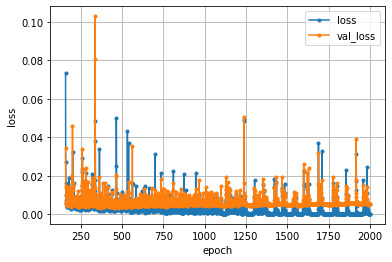

In [130]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>0.1: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

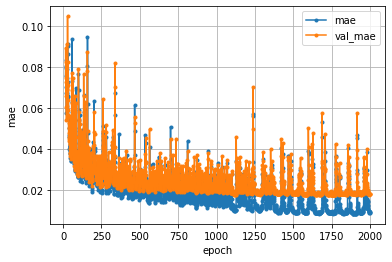

In [131]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>0.1: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [132]:
# 学習モデルの保存
model_2.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [133]:
# model_3

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.8                 #train:validのtrainデータの割合
seed = 1                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [134]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_3 = Model(inputs=[x.input, y.input], outputs=z)
model_3.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [135]:
# 学習
epochs = 2000
batch_size = 64
history = model_3.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
50/50 [==============================] - 1s 10ms/step - loss: 0.3389 - mae: 0.2456 - val_loss: 0.5151 - val_mae: 0.2131
Epoch 2/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.2621 - mae: 0.1819 - val_loss: 0.4115 - val_mae: 0.1961
Epoch 3/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1644 - mae: 0.1558 - val_loss: 0.3358 - val_mae: 0.1802
Epoch 4/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1490 - mae: 0.1449 - val_loss: 0.2919 - val_mae: 0.1950
Epoch 5/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1753 - mae: 0.1472 - val_loss: 0.2310 - val_mae: 0.1325
Epoch 6/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1237 - mae: 0.1069 - val_loss: 0.1691 - val_mae: 0.1080
Epoch 7/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.0939 - mae: 0.0948 - val_loss: 0.1449 - val_mae: 0.1011
Epoch 8/2000
50/50 [==============================] - 0s 7ms/step - loss: 0

In [136]:
# モデルの評価
score = model_3.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 2ms/step - loss: 0.0065 - mae: 0.0159
Test loss: 0.006516813300549984
Test mae: 0.015934040769934654


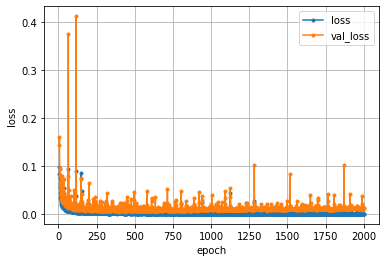

In [137]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>0.1: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

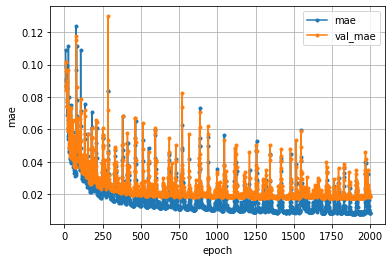

In [151]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>0.15: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [139]:
# 学習モデルの保存
model_3.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [140]:
# model_4

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合
seed = 1                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [141]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_4 = Model(inputs=[x.input, y.input], outputs=z)
model_4.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [142]:
# 学習
epochs = 2000
batch_size = 64
history = model_4.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
32/32 [==============================] - 1s 13ms/step - loss: 0.3518 - mae: 0.2343 - val_loss: 0.3983 - val_mae: 0.1871
Epoch 2/2000
32/32 [==============================] - 0s 16ms/step - loss: 0.2269 - mae: 0.1671 - val_loss: 0.3734 - val_mae: 0.1779
Epoch 3/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.2459 - mae: 0.1729 - val_loss: 0.3514 - val_mae: 0.1715
Epoch 4/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.3019 - mae: 0.1722 - val_loss: 0.3334 - val_mae: 0.1844
Epoch 5/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.1486 - mae: 0.1464 - val_loss: 0.2783 - val_mae: 0.1619
Epoch 6/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.1506 - mae: 0.1410 - val_loss: 0.2041 - val_mae: 0.1255
Epoch 7/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.1806 - mae: 0.1292 - val_loss: 0.1798 - val_mae: 0.1302
Epoch 8/2000
32/32 [==============================] - 0s 8ms/step - loss: 

In [143]:
# モデルの評価
score = model_4.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 2ms/step - loss: 0.0094 - mae: 0.0182
Test loss: 0.009420584887266159
Test mae: 0.01820486970245838


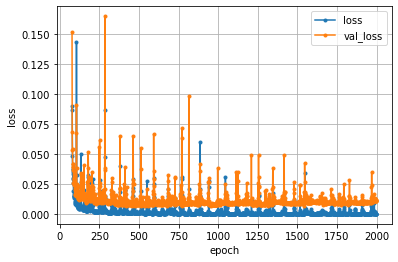

In [149]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>0.15: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

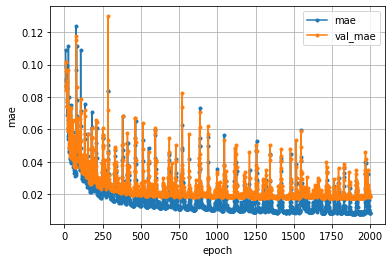

In [150]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>0.15: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [146]:
# 学習モデルの保存
model_4.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")